In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [36]:
data = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [37]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914062,60381.914062,27625734377
2024-08-23,60380.953125,64947.062500,60372.050781,64094.355469,64094.355469,42530509233


In [38]:
data['returns']=data['Adj Close'].pct_change()

In [39]:
data['buy_and_hold'] = (1+data['returns']).cumprod()

In [40]:
data['position'] = np.random.choice([0,1], size=len(data))

In [41]:
data['position'][0] = 1

/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_14844/3126755003.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['position'][0] = 1
/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_14844/3126755003.py:1: Setting

In [42]:
data['random']= (1 + data['returns']*data['position']).cumprod() 

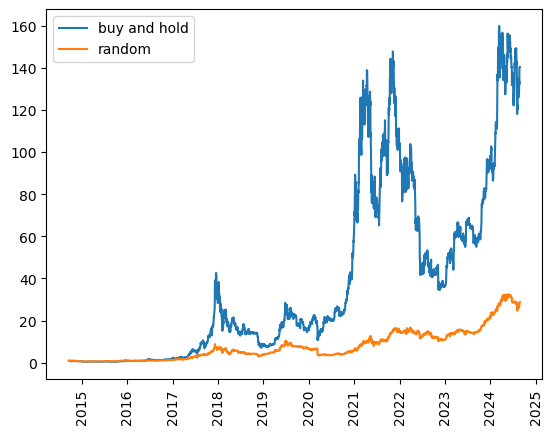

In [43]:
plt.plot(data['buy_and_hold'], label='buy and hold')
plt.plot(data['random'], label='random')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [44]:
print('A $1 investment for the buying and holding strategy would have turned into $', round(data['buy_and_hold'][-1],2))
print('A $1 investment for the random strategy would have turned into $', round(data['random'][-1],2))

A $1 investment for the buying and holding strategy would have turned into $ 140.33
A $1 investment for the random strategy would have turned into $ 28.85


/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_14844/2138464969.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('A $1 investment for the buying and holding strategy would have turned into $', round(data['buy_and_hold'][-1],2))
/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_14844/2138464969.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('A $1 investment for the random strategy would have turned into $', round(data['random'][-1],2))
